# Mean, Std

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm, t
warnings.filterwarnings('ignore')

In [ ]:
data = np.random.normal(loc=0, scale=1, size=1000)

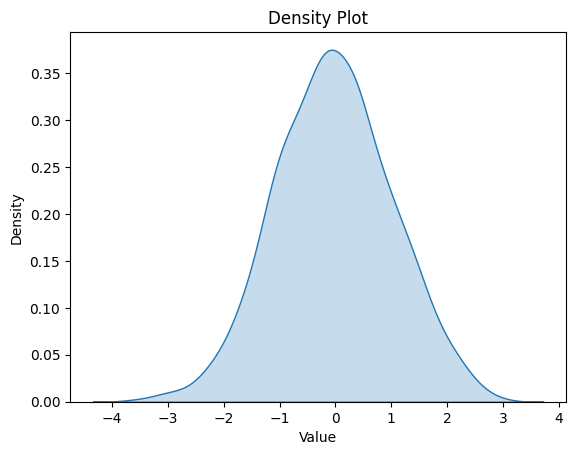

In [ ]:
sns.kdeplot(data, shade=True)  # 'shade' fills the area under the KDE curve
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [ ]:
data.mean(), data.var(ddof = 1)

(-0.03467354487867218, 1.089948708943901)

In [ ]:
mean = sum(data)/len(data); mean

-0.034673544878672205

In [ ]:
var = sum((data - mean)**2)/(len(data)-1); var

1.0899487089439006

In [ ]:
data2 = np.random.choice([0,1], 1000, p = [0.4,0.6])

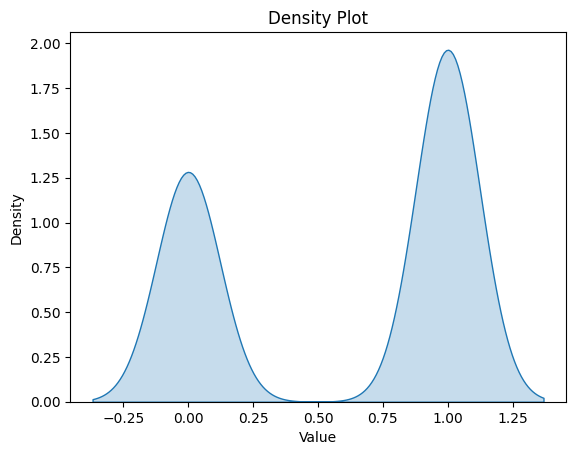

In [ ]:
sns.kdeplot(data2, shade=True)
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [ ]:
data2.mean(), data2.var(ddof = 1)

(0.605, 0.23921421421421427)

In [ ]:
mean2 = sum(data2)/len(data2); print(mean2)
var2 = sum((data2-mean2)**2)/(len(data2)-1); var2

0.605


0.23921421421421477

# Central limit theorem

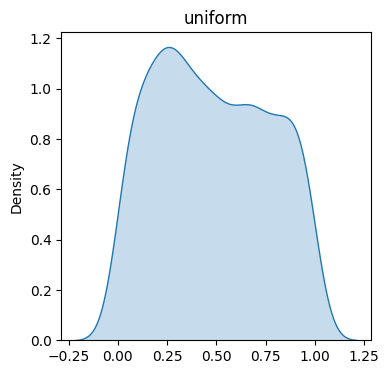

In [ ]:
d = np.random.uniform(low = 0, high = 1, size = 1000)
plt.figure(figsize = (4,4))
plt.title("uniform")
sns.kdeplot(d, shade = True)
plt.show()

In [ ]:
def central_limit(trials):
    number_of_random_variables = trials[0:6]
    plt.figure(figsize=(8, 12))
    for i,k in enumerate(number_of_random_variables):
        uniform = np.random.uniform(low = 0, high = 1, size = (k, 100))
        res = sum(uniform, 1)/k
        plt.subplot(3,2,i+1)
        sns.kdeplot(res, shade=True)
        plt.ylabel("")
        plt.text(y = k**(1/2), x = 0.5,  s = f'k = {k}')
    plt.show()

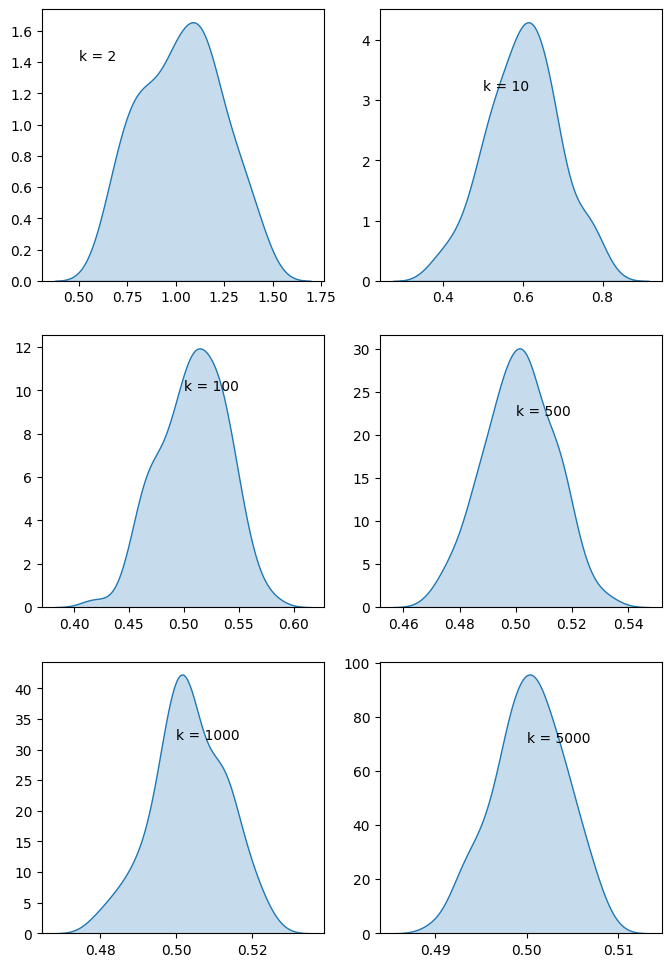

In [ ]:
central_limit([2, 10, 100, 500, 1000, 5000])

# Functions of random variables

In [ ]:
gaus1 = np.random.normal(loc = 0, scale = 1, size = 1000)
gaus2 = np.random.normal(loc = 0, scale = 1, size = 1000)
gaus = gaus1+gaus2; gaus.shape

(1000,)

In [ ]:
gaus1.mean(), gaus1.var()

(0.05620803596971899, 0.95974463773335)

In [ ]:
gaus2.mean(), gaus2.var()

(0.012327996284589481, 1.0362157874973512)

In [ ]:
gaus.mean(), gaus.var()

(0.06853603225430847, 2.014393696019995)

Sum of normal variables is also normaly distributed, mu = mu1 + mu2,
var = var1 + var2, if mu1 = mu2 = mui, var1 = var2 = vari:
**mu = N\*mu_i, var = N\*var_i, std = sqrt(N)\*std_i**

## mu^


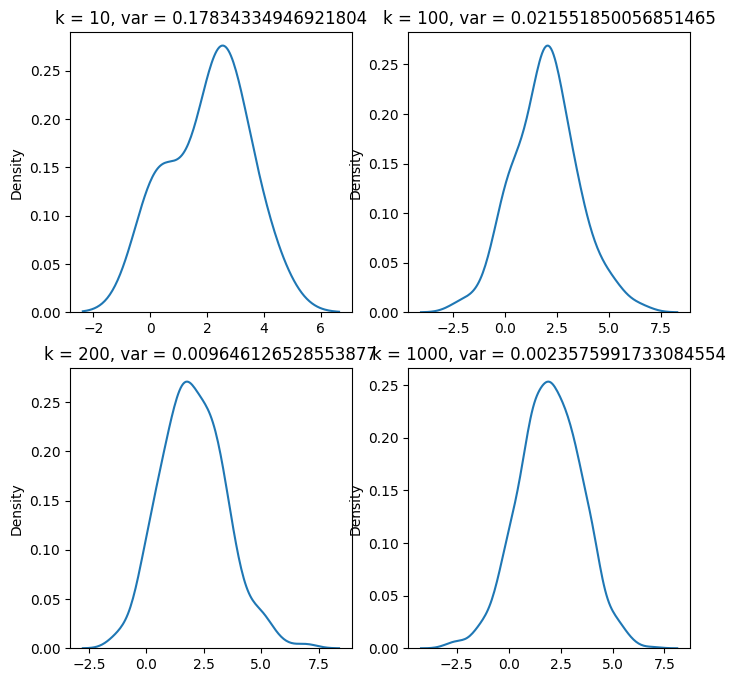

In [ ]:
# np.random.normal(loc = 2, scale = 1.5) #var = 2.25
n_samples = [10, 100,200, 1000]
plt.figure(figsize= (8,8))
for i,k in enumerate(n_samples):
    means = []
    for m in range(100):
        dataset = np.random.normal(loc = 2, scale = 1.5, size = k)
        means.append(dataset.mean())

    var = np.array(means).var()
    plt.subplot(2,2,i+1)
    sns.kdeplot(dataset)
    plt.title(f'k = {k}, var = {var}')
plt.show()

# Confidence Intervals

In [ ]:
data = np.random.normal(loc = 1, scale = 2, size = 1000)
mean = data.mean()
print(mean)
sd = data.std(ddof = 1)
print(sd)

0.9837748463659863
1.9556144597165852


In [ ]:
a = norm.ppf(0.025, loc = 1, scale = 2)
b = norm.ppf(0.975, loc = 1, scale = 2)
print(a)
print(b)

-2.919927969080109
4.919927969080108


In [ ]:
x = np.linspace(-3*2 + 1, 3*2+1, 1000)
pdf = norm.pdf(x, loc = 1, scale = 2)

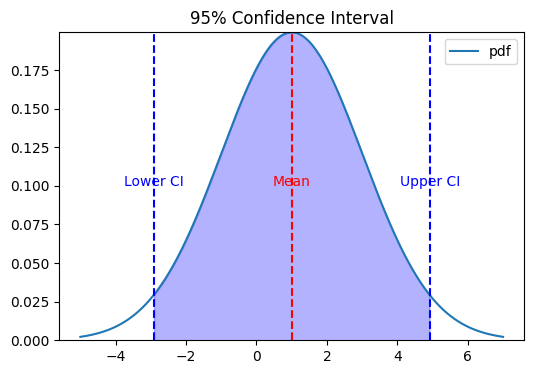

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(x, pdf)

#mean
plt.axvline(x=1, color='red', linestyle='--')
plt.text(1, 0.1, 'Mean', horizontalalignment='center', color='red')

# Adding lines for the confidence interval
plt.axvline(x=a, color='blue', linestyle='--')
plt.axvline(x=b, color='blue', linestyle='--')

#fill
plt.fill_between(x, pdf, where=(x > a) & (x < b), color="blue", alpha=0.3)
plt.title('95% Confidence Interval')

plt.text(a, 0.1, 'Lower CI', horizontalalignment='center', color='blue')
plt.text(b, 0.1, 'Upper CI', horizontalalignment='center', color='blue')
plt.ylim([0, max(pdf)])
plt.legend(['pdf'])
plt.show()

## mu^ 95% CI

In [ ]:
data = np.random.normal(loc = 1, scale = 2, size = 100)
mean = data.mean()
print(mean)
sd = data.std(ddof = 1)
print(sd)

0.8186598598662197
1.9808933683908185


In [ ]:
a = norm.ppf(0.025, loc = 1, scale = 2)
b = norm.ppf(0.975, loc = 1, scale = 2)
print(a)
print(b)

-2.919927969080109
4.919927969080108


95% CI for mu^

In [ ]:
1.96*2 + 1

4.92

In [ ]:
-1.96*2 + 1

-2.92

## Mu^ experiment z CI

In [ ]:
def z_experiment(N):
    mu = 2; std = 2
    x = np.random.normal(loc = mu, scale = std, size = N)
    mean = x.mean()
    sd = x.std(ddof = 1)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    mu_right = z_right*sd/np.sqrt(N) + mean
    mu_left = z_left*sd/np.sqrt(N) + mean
    return mu <= mu_right and mu >= mu_left

In [ ]:
def z_experiments(M):
    return np.mean([z_experiment(100) for _ in range(M)])

In [ ]:
(1 - z_experiments(10000))*100

5.359999999999998

## Mu^ experiment t CI

In [ ]:
def t_experiment(N):
    mu = 2; std = 2
    x = np.random.normal(loc = mu, scale = std, size = N)
    mean = x.mean()
    sd = x.std(ddof = 1)
    t_left = t.ppf(0.025, N-1)
    t_right = norm.ppf(0.975, N-1)
    mu_right = t_right*sd/np.sqrt(N) + mean
    mu_left = t_left*sd/np.sqrt(N) + mean
    return mu <= mu_right and mu >= mu_left

In [ ]:
def t_experiments(M):
    return np.mean([t_experiment(1000) for _ in range(M)])

In [ ]:
(1 - t_experiments(10000))*100

2.3599999999999954

# T distribution

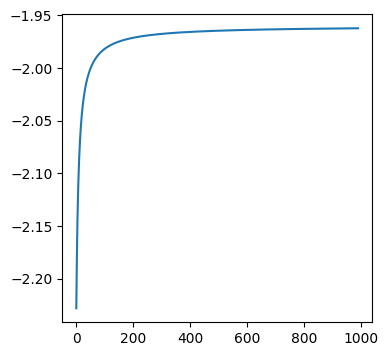

In [ ]:
ci_95_N = t.ppf(0.025, range(10, 1000))
plt.figure(figsize = (4,4))
plt.plot(ci_95_N)
plt.show()

# Z test - 2 tailed, one sample

In [ ]:
mu = 2
sigma = 2
N = 75
x = np.random.normal(mu, sigma, size = N)
mu_0 = 2.5
alpha = 0.05

In [ ]:
mu_hat = x.mean()
sd_hat = x.std(ddof = 1)
z = (mu_hat - mu_0) / (sd_hat/np.sqrt(N))
print(z)

-2.0541054347026426


In [ ]:
2*norm.cdf(z)*100

3.996548817542922

# Z test - one tailed, one sample

In [ ]:
alpha = 0.05
z_critical = norm.ppf(0.05)
print(z_critical)

-1.6448536269514729


In [ ]:
mu = 2
mu_0 = 2.3
sigma = 1.5
N = 75
x = np.random.normal(mu, sigma, N)
mu_hat = x.mean()
sd_hat = x.std()

In [ ]:
z = (mu - mu_0) / (sd_hat/np.sqrt(N))
print(z)
print(norm.cdf(z))

-1.888234363436652
0.029497247243893382
